<a href="https://colab.research.google.com/github/dab31415/SPS-Bridge-Math/blob/main/Math_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Math HW1<br>
Donald Butler<br>
07/25/2021

##Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine

In [3]:
def vending_machine(n):
  if n % 2 == 0:
    print('even')
  else:
    print('odd')
  
  print(*range(n,n+20,2),sep=", ")

vending_machine(5)
vending_machine(12)


odd
5, 7, 9, 11, 13, 15, 17, 19, 21, 23
even
12, 14, 16, 18, 20, 22, 24, 26, 28, 30


##Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually

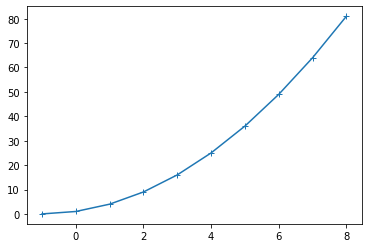

In [10]:
from pylab import plot, show 

x_values = range(-1,9)
y_values = []
for x in x_values:
  y = x**2 + 2*x + 1
  y_values.append(y)

plot(x_values,y_values, marker='+')
show()


##Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator

In [26]:
from collections import Counter

def calculate_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s/N
  return mean

def calculate_median(numbers):
  N = len(numbers)
  numbers.sort()
  if N % 2 == 0:
    median = (numbers[int(N/2)]+numbers[int(N/2)+1])/2
  else:
    median = numbers[int((N+1)/2)]
  return median

def calculate_mode(numbers):
  c = Counter(numbers)
  numbers_freq = c.most_common()
  max_count = numbers_freq[0][1]
  modes = []
  for num in numbers_freq:
    if num[1] == max_count:
      modes.append(num[0])
  return modes

def find_differences(numbers):
  mean = calculate_mean(numbers)
  diff = []
  for num in numbers:
    diff.append(num-mean)
  return diff

def calculate_variance(numbers):
  diff = find_differences(numbers)
  squared_diff = []
  for d in diff:
    squared_diff.append(d**2)
  sum_squared_diff = sum(squared_diff)
  variance = sum_squared_diff/len(numbers)
  return variance

text_data = []
with open('mydata.txt') as f:
  for line in f:
    text_data.append(int(line))

text_data
mean = calculate_mean(text_data)
print('mean: {0}'.format(mean))

median = calculate_median(text_data)
print('median: {0}'.format(median))

modes = calculate_mode(text_data)
print('mode(s): {0}'.format(modes))

variance = calculate_variance(text_data)
print('variance: {0:.3f}'.format(variance))

std = variance**.5
print('standard deviation: {0:.3f}'.format(std))



mean: 477.75
median: 501.5
mode(s): [100, 500]
variance: 141047.354
standard deviation: 375.563


##Chapter 4.  Programming Challenge 4 page 117, Solving Single-Variable Inequalities

In [59]:
from sympy import Symbol, sympify, solve, Poly, solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality
from sympy.core.sympify import SympifyError

def isolve(expr):
  x = Symbol('x')
  if expr.lhs.is_polynomial():
    result = solve_poly_inequality(Poly(expr.lhs,x),expr.rel_op)
  elif expr.lhs.is_rational_function():
    numer, denom = expr.lhs.as_numer_denom()
    result = solve_rational_inequalities([[((Poly(numer),Poly(denom)),expr.rel_op)]])
  else:
    result = solve_univariate_inequality(expr,x, relational=False)
  return result

try:
  expr = sympify(input('Enter inequality expression: '))
except SympifyError:
  print('Invalid expression entered')
else:
  print(isolve(expr))


Enter inequality expression: sin(x)-cos(x)>.5
other
Interval.open(1.14676528730416, 0.424031039490741 + pi)


##Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers

In [81]:
import random

def roll():
  return random.randint(1,6)

def roll_trial(num_rolls):
  sum_rolls = 0
  for i in range(num_rolls):
    sum_rolls = sum_rolls + roll()
  return (sum_rolls/num_rolls)

print('Expected value: {0}'.format(sum(range(1,7))/6))
trials = [100,1000,10000,100000,500000]
for trial in trials:
  print('Trials: {0} Trial average {1:5f}'.format(trial,roll_trial(trial)))


Expected value: 3.5
Trials: 100 Trial average 3.380000
Trials: 1000 Trial average 3.434000
Trials: 10000 Trial average 3.512700
Trials: 100000 Trial average 3.501690
Trials: 500000 Trial average 3.498158


##Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent

Enter a function in one variable: 3*x**4-2*x**3+3*x**2-7*x
Enter the variable to differentiate with respect to: x
Enter the inital value of the variable: 1
x: 0.795135273470865
Minimum value: -3.47547677555618


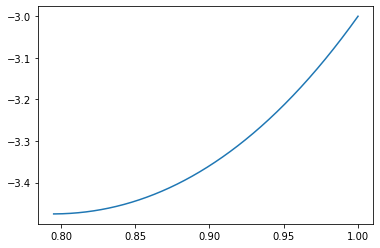

In [96]:
from sympy import Symbol, sympify, Derivative, solve
from sympy.core.sympify import SympifyError
from pylab import plot, show

def grad_decent(x0, f1x, x):
  if not solve(f1x):
    print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
    return

  epsilon = 1e-6
  step_size = 1e-4
  x_values = [x0]
  while (len(x_values)) < 2 or (abs(x_values[len(x_values)-2] - x_values[len(x_values)-1]) > epsilon):
    x_values.append(x_values[len(x_values)-1] - step_size * f1x.subs({x:x_values[len(x_values)-1]}).evalf())
  return x_values

f = input('Enter a function in one variable: ')
var = input('Enter the variable to differentiate with respect to: ')
var0 = float(input('Enter the inital value of the variable: '))

try:
  f = sympify(f)
except SympifyError:
  print('Invalid function entered')
else:
  var = Symbol(var)
  d = Derivative(f,var).doit()
  var_min = grad_decent(var0,d,var)
  if var_min:
    print('{0}: {1}'.format(var.name, var_min[len(var_min)-1]))
    print('Minimum value: {0}'.format(f.subs({var:var_min[len(var_min)-1]})))

    y_values = []
    for x_value in var_min:
      y_values.append(f.subs({var:x_value}).evalf())
    plot(var_min,y_values)
    show()
